In [2598]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2599]:
df=pd.read_excel("bpython.xlsx")
df.head()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2017-04-01,2017-04-01,46.0,37.0,0,606,1446,1915,1430,5397
1,2017-04-02,2017-04-02,62.1,41.0,0,2021,3943,4207,2862,13033
2,2017-04-03,2017-04-03,63.0,50.0,0.03,2470,4988,5178,3689,16325
3,2017-04-04,2017-04-04,51.1,46.0,1.18,723,1913,2279,1666,6581
4,2017-04-05,2017-04-05,63.0,46.0,0,2807,5276,5711,4197,17991


In [2600]:
#Get Col names
df.columns

Index(['Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation',
       'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge',
       'Queensboro Bridge', 'Total'],
      dtype='object')

In [2601]:
#Rename columns to remove spaces and unnecessary symbols
df.columns=[ 'Date', 'Day', 'HighTempF', 'LowTempF','Precipitation', 'BrooklynBridge', 'ManhattanBridge',
       'WilliamsburgBridge', 'QueensboroBridge', 'Total']
df.head()

,Date,Day,HighTempF,LowTempF,Precipitation,BrooklynBridge,ManhattanBridge,WilliamsburgBridge,QueensboroBridge,Total
0,2017-04-01,2017-04-01,46.0,37.0,0,606,1446,1915,1430,5397
1,2017-04-02,2017-04-02,62.1,41.0,0,2021,3943,4207,2862,13033
2,2017-04-03,2017-04-03,63.0,50.0,0.03,2470,4988,5178,3689,16325
3,2017-04-04,2017-04-04,51.1,46.0,1.18,723,1913,2279,1666,6581
4,2017-04-05,2017-04-05,63.0,46.0,0,2807,5276,5711,4197,17991


In [2602]:
#Let's check data types and see if we have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
Date                  214 non-null datetime64[ns]
Day                   214 non-null datetime64[ns]
HighTempF             214 non-null float64
LowTempF              214 non-null float64
Precipitation         214 non-null object
BrooklynBridge        214 non-null int64
ManhattanBridge       214 non-null int64
WilliamsburgBridge    214 non-null int64
QueensboroBridge      214 non-null int64
Total                 214 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(5), object(1)
memory usage: 16.8+ KB


In [2603]:
#We can see that col Precipitation is object. let's find the reason
df['Precipitation'].unique().tolist()

[0,
 0.03,
 1.18,
 0.73,
 'T',
 0.02,
 0.17,
 0.29,
 0.11,
 0.91,
 0.34,
 0.06,
 3.02,
 0.18,
 0.01,
 1.31,
 0.59,
 0.04,
 0.58,
 0.1,
 0.13,
 0.09,
 1.39,
 1.35,
 1.29,
 0.23,
 0.45,
 1.78,
 0.35,
 0.57,
 0.74,
 0.15,
 0.3,
 0.76,
 0.88,
 0.53,
 0.42,
 0.22,
 0.26,
 0.07,
 0.08,
 0.2,
 3.03,
 0.25]

In [2604]:
#T stands for "trace of precipitation". Trace denotes an amount of precipitation, 
#such as rain or snow, that is greater than zero, but is too small to be measured by standard units. 
#So we'll zero this out


In [2605]:
from pandas.api.types import CategoricalDtype

df['Precipitation']=df['Precipitation'].replace(['T'],0)
#Values in column 'Day' are replaced with Week name since they appeared to be similar with the col Date
df['Day']=df['Day'].dt.weekday_name
#We need to change col Day type to be able to sort values in an appropriate form not alphabetically.
weekdays = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
weekdays_type = CategoricalDtype(categories=weekdays, ordered=True)
df['Day']=df['Day'].astype(weekdays_type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
Date                  214 non-null datetime64[ns]
Day                   214 non-null category
HighTempF             214 non-null float64
LowTempF              214 non-null float64
Precipitation         214 non-null float64
BrooklynBridge        214 non-null int64
ManhattanBridge       214 non-null int64
WilliamsburgBridge    214 non-null int64
QueensboroBridge      214 non-null int64
Total                 214 non-null int64
dtypes: category(1), datetime64[ns](1), float64(3), int64(5)
memory usage: 15.7 KB


In [2606]:
#Check for duplicates
print(df.duplicated().sum())
#Let's check the date period and # of rows
print(df['Date'].min())
print(df['Date'].max())
print(len(df))

0
2017-04-01 00:00:00
2017-10-31 00:00:00
214


In [2607]:
#Let's find Holldays and add it to our dataframe
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

period = pd.date_range(start='2017-4-01', end='2017-10-31')
cal = calendar()
holidays = cal.holidays(start=period.min(), end=period.max())

df['Holiday'] = df['Date'].isin(holidays)
print(df['Holiday'].unique().tolist())
print(holidays)
df[(df['Holiday'])==True]

[False, True]
DatetimeIndex(['2017-05-29', '2017-07-04', '2017-09-04', '2017-10-09'], dtype='datetime64[ns]', freq=None)


,Date,Day,HighTempF,LowTempF,Precipitation,BrooklynBridge,ManhattanBridge,WilliamsburgBridge,QueensboroBridge,Total,Holiday
58,2017-05-29,Monday,57.9,55.9,0.13,836,1730,2738,1704,7008,True
94,2017-07-04,Tuesday,82.9,70.0,0.00,2296,4084,3684,3861,13925,True
156,2017-09-04,Monday,79.0,62.1,0.00,2866,4766,4882,4346,16860,True
191,2017-10-09,Monday,75.9,72.0,0.26,898,2321,3079,2642,8940,True


In [2608]:
df.describe()

,HighTempF,LowTempF,Precipitation,BrooklynBridge,ManhattanBridge,WilliamsburgBridge,QueensboroBridge,Total
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.201869,62.027103,0.131776,2680.042056,5345.485981,6051.658879,4550.490654,18627.677570
std,10.390443,9.305792,0.394216,854.710864,1746.546523,1755.814991,1306.899746,5539.557489
min,46.000000,37.000000,0.000000,151.000000,484.000000,874.000000,865.000000,2374.000000
25%,66.900000,55.225000,0.000000,2298.000000,4308.000000,5115.000000,3746.000000,15704.750000
50%,75.900000,64.000000,0.000000,2857.000000,5607.500000,6287.000000,4681.000000,19367.000000
75%,82.000000,70.000000,0.037500,3285.000000,6759.500000,7512.500000,5692.000000,23151.500000
max,93.900000,78.100000,3.030000,4960.000000,8239.000000,8873.000000,6582.000000,26969.000000


In [2609]:
#Let's unpivot table to put Bridge names into one column for furter analysis
bicycle_history = df.melt(id_vars=['Date', 'Day', 'HighTempF', 'LowTempF','Precipitation','Total','Holiday'], var_name='BridgeName', value_name='NumBicycles')
#Add spaces
bicycle_history['BridgeName'] = bicycle_history['BridgeName'].str.replace( r"([A-Z])", r" \1").str.strip()
bicycle_history.head()


,Date,Day,HighTempF,LowTempF,Precipitation,Total,Holiday,BridgeName,NumBicycles
0,2017-04-01,Saturday,46.0,37.0,0.00,5397,False,Brooklyn Bridge,606
1,2017-04-02,Sunday,62.1,41.0,0.00,13033,False,Brooklyn Bridge,2021
2,2017-04-03,Monday,63.0,50.0,0.03,16325,False,Brooklyn Bridge,2470
3,2017-04-04,Tuesday,51.1,46.0,1.18,6581,False,Brooklyn Bridge,723
4,2017-04-05,Wednesday,63.0,46.0,0.00,17991,False,Brooklyn Bridge,2807


In [2610]:
#Check data type, null values and # of records shoud be 856
bicycle_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 9 columns):
Date             856 non-null datetime64[ns]
Day              856 non-null category
HighTempF        856 non-null float64
LowTempF         856 non-null float64
Precipitation    856 non-null float64
Total            856 non-null int64
Holiday          856 non-null bool
BridgeName       856 non-null object
NumBicycles      856 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 48.9+ KB


# EDA

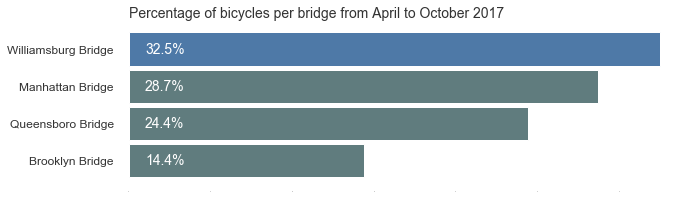

In [2611]:

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

plt.rcParams['figure.figsize']=10,3
col=['#4e79a7', '#607c7e', '#607c7e', '#607c7e']

bicycle_history.groupby('BridgeName').pipe(lambda group: (group.NumBicycles.sum()/bicycle_history['NumBicycles'].sum())*100) \
                  .round(2).to_frame('NumBicycles').sort_values('NumBicycles',ascending=False).reset_index().plot(kind='barh',x='BridgeName',y='NumBicycles',\
                        color=col,width=0.9)

plt.title('Percentage of bicycles per bridge from April to October 2017', size=14, loc="left", color='#333333')
plt.xlabel('',fontsize=0)
plt.ylabel('',fontsize=0)

#Remove ticks
plt.tick_params(axis='both', labelsize=0, length = 0)
plt.grid(False)

ax = plt.gca()
#Add spaces between Y tick Labels and the axis
ax.tick_params(axis='y', which='major', pad=15)

plt.yticks(fontsize=12, color='#333333')
  
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Show top values  
ax.invert_yaxis() 

#Annotate bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate('{:.1f}%'.format(p.get_width()),xy=(left+1, bottom+height/2),
                 ha='left', va='center',fontsize = 14, color='white')
    
ax.get_legend().remove()



The graph above shows that Williamsburg Bridge is the busiest among others and, for instance, has twice the load of Brooklyn Bridge.

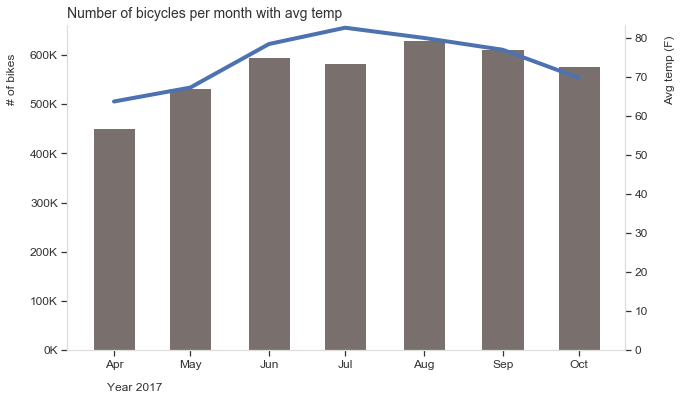

In [2612]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = '#333333'

bike_per_month=df.groupby([df['Date'].dt.to_period("M")], as_index=False).agg({'Date':['min'],'Total':'sum','HighTempF':'mean'}).round(2)
bike_per_month.columns = bike_per_month.columns.droplevel(1)

ax1.set_title('Number of bicycles per month with avg temp', fontsize=14, loc="left", color=color)
ax1.set_xlabel('Year 2017', fontsize=12, color=color)
ax1.set_ylabel('# of bikes', fontsize=12, color=color)
ax1.tick_params(axis='both', which='major', labelsize=12, colors=color)

ax2=ax1.twinx()
ax2.set_ylabel('Avg temp (F)', fontsize=12, color=color)
ax2.tick_params(axis='both', which='major', labelsize=12, colors=color)


ax1.bar(bike_per_month['Date'], bike_per_month['Total'], color=['#79706e'],width=16.7)
ax2.plot(bike_per_month['Date'], bike_per_month['HighTempF'],linewidth=4)

ax2.set_ylim(ymin=0) #2nd y axis Startr with 0

#set x ticks every month
ax1.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

ax1.yaxis.set_label_coords(-0.09,0.83)
ax1.xaxis.set_label_coords(0.12,-0.1)
ax2.yaxis.set_label_coords(1.07,0.86)

#Format y axis to Units
from matplotlib.ticker import FuncFormatter
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax1.yaxis.set_major_formatter(FuncFormatter(f))

#Styling
ax = plt.gca()
ax.spines['top'].set_color('#ffffff')
ax1.set_frame_on(False)
ax.spines['right'].set_color('#DDDDDD')
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')



The graph above shows how temparature impacts the number of bicycle ridership. 
The higher the temp the more people are inclined to cycle. 

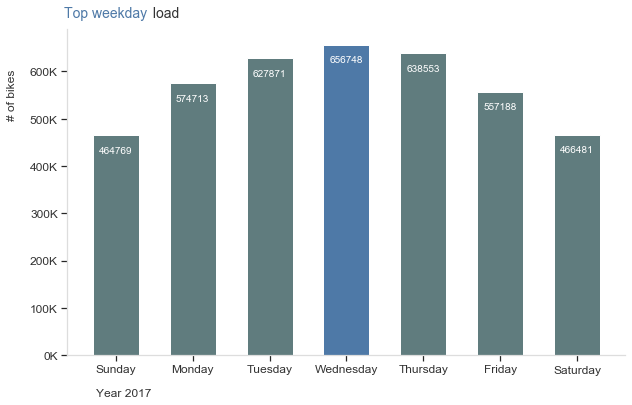

In [2613]:

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

df_week=bicycle_history.groupby(['Day'], as_index=False).agg({'NumBicycles':['sum']} )#.reindex(labels=weekdays)
df_week.columns = df_week.columns.droplevel(1)
df_week['num']=df_week['NumBicycles'].rank(method='dense',ascending=False)


color = '#333333'
col_bar=(df_week['num']==1).map({True: '#4e79a7',False: '#607c7e'})

plt.rcParams['figure.figsize']=10,6

plt.bar(df_week['Day'], df_week['NumBicycles'], color=col_bar,width=0.6)

#Color titles
fig1 = plt.figure(1)
fig1.text(0.12, 0.90, "Top weekday", va="bottom",color="#4e79a7", size=14)
fig1.text(0.26,0.90, " load", ha="center", va="bottom", size=14, color=color)

plt.ylabel('# of bikes',fontsize=12, color=color)
plt.xlabel('Year 2017',fontsize=12, color=color)

ax = plt.gca()
plt.xticks(rotation='horizontal',fontsize=12, color=color)
plt.yticks(rotation='horizontal',fontsize=12, color=color)

#axis align
ax.yaxis.set_label_coords(-0.09,0.80)
ax.xaxis.set_label_coords(0.10,-0.1)

#Annotate bars
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate('{}'.format(height),xy=(rect.get_x() + rect.get_width() / 2, height),xytext=(0, -20),textcoords="offset points",ha='center', va='bottom', size=10, color='white')

#Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')

#Format y axis to Units
from matplotlib.ticker import FuncFormatter
f = lambda x, pos: f'{x/10**3:,.0f}K'
ax.yaxis.set_major_formatter(FuncFormatter(f))

The graph above represents that there are more riders in general on weekdays vs. weekends, and Wednesday ridership peaks.

Now I want to see how temp, precipitation and holidays influence on bridges load
First I need to translate temp and precipitation condition. To do this I'm going to add 2 columns

In [2614]:

import numpy as np

conditions=[
           (df['Precipitation']>=3),
           (df['Precipitation']>=2)&(df['Precipitation']<=2.99),
           (df['Precipitation']>=1.25)&(df['Precipitation']<=1.99 ),
           (df['Precipitation']>=0.75)&(df['Precipitation']<=1.24 ),
           (df['Precipitation']>=-0.74)&(df['Precipitation']<=0.74 ),
           (df['Precipitation']>=-1.24)&(df['Precipitation']<=-0.75 ),
           (df['Precipitation']>=-1.99)&(df['Precipitation']<=-1.25 ),
           (df['Precipitation']>=-2.99)&(df['Precipitation']<=-2 ),
           (df['Precipitation']<=-3)
           ]
values=['Exceptionally wet','Extremly wet','Very wet', 'Moderatary Wet','Near Normal', 'Moderatary Dry','Very Dry', 'Extremly dry','Exceptionally dry']
df['WeatherCondition']=np.select(conditions, values,'Unknown')

conditions_temp=[
           (df['HighTempF']>=85),
           (df['HighTempF']<85)&(df['HighTempF']>68),
           (df['HighTempF']<=68)&(df['HighTempF']>50 ),
           (df['HighTempF']<=50)&(df['HighTempF']>32 ),
           (df['HighTempF']<=32)
           ]
values_temp=['Hot','Warm','Moderate', 'Cold','freezing']
df['TempCondition']=np.select(conditions_temp, values_temp,'Unknown')

print(df['WeatherCondition'].unique().tolist())

print(df['TempCondition'].unique().tolist())
df.head()


['Near Normal', 'Moderatary Wet', 'Exceptionally wet', 'Very wet']
['Cold', 'Moderate', 'Warm', 'Hot']


,Date,Day,HighTempF,LowTempF,Precipitation,BrooklynBridge,ManhattanBridge,WilliamsburgBridge,QueensboroBridge,Total,Holiday,WeatherCondition,TempCondition
0,2017-04-01,Saturday,46.0,37.0,0.00,606,1446,1915,1430,5397,False,Near Normal,Cold
1,2017-04-02,Sunday,62.1,41.0,0.00,2021,3943,4207,2862,13033,False,Near Normal,Moderate
2,2017-04-03,Monday,63.0,50.0,0.03,2470,4988,5178,3689,16325,False,Near Normal,Moderate
3,2017-04-04,Tuesday,51.1,46.0,1.18,723,1913,2279,1666,6581,False,Moderatary Wet,Moderate
4,2017-04-05,Wednesday,63.0,46.0,0.00,2807,5276,5711,4197,17991,False,Near Normal,Moderate


Second I'll need this rows for further table formatting and pivoting

In [2615]:

df['Period']=df['Date'].dt.to_period("M")
df['WeekNum']=df.groupby(['Period','Day'])['Date'].rank(ascending=True)
df['WeekNum']=df['WeekNum'].astype(int)
df['WeekRow']=df['WeekNum']-1

print(len(df))
df.head(5)

214


,Date,Day,HighTempF,LowTempF,Precipitation,BrooklynBridge,ManhattanBridge,WilliamsburgBridge,QueensboroBridge,Total,Holiday,WeatherCondition,TempCondition,Period,WeekNum,WeekRow
0,2017-04-01,Saturday,46.0,37.0,0.00,606,1446,1915,1430,5397,False,Near Normal,Cold,2017-04,1,0
1,2017-04-02,Sunday,62.1,41.0,0.00,2021,3943,4207,2862,13033,False,Near Normal,Moderate,2017-04,1,0
2,2017-04-03,Monday,63.0,50.0,0.03,2470,4988,5178,3689,16325,False,Near Normal,Moderate,2017-04,1,0
3,2017-04-04,Tuesday,51.1,46.0,1.18,723,1913,2279,1666,6581,False,Moderatary Wet,Moderate,2017-04,1,0
4,2017-04-05,Wednesday,63.0,46.0,0.00,2807,5276,5711,4197,17991,False,Near Normal,Moderate,2017-04,1,0


In [2616]:
#Get weekColumn then we're going to use it to highlight holiday col:row in a pivot table
week_col = df.groupby(['Period','Day'])['WeekRow'].sum().reset_index() 
week_col['WeekRow']=week_col.reset_index().index #rewrite values
week_col.rename(columns={'WeekRow':'WeekCol'}, inplace=True)
week_col.tail()

,Period,Day,WeekCol
44,2017-10,Tuesday,44
45,2017-10,Wednesday,45
46,2017-10,Thursday,46
47,2017-10,Friday,47
48,2017-10,Saturday,48


In [2617]:
#Add column Week col by joining 2 tables
df=pd.merge(df,week_col,how="left", left_on=['Period','Day'], right_on=['Period','Day'])
df.head()
                                            

,Date,Day,HighTempF,LowTempF,Precipitation,BrooklynBridge,ManhattanBridge,WilliamsburgBridge,QueensboroBridge,Total,Holiday,WeatherCondition,TempCondition,Period,WeekNum,WeekRow,WeekCol
0,2017-04-01,Saturday,46.0,37.0,0.00,606,1446,1915,1430,5397,False,Near Normal,Cold,2017-04,1,0,6
1,2017-04-02,Sunday,62.1,41.0,0.00,2021,3943,4207,2862,13033,False,Near Normal,Moderate,2017-04,1,0,0
2,2017-04-03,Monday,63.0,50.0,0.03,2470,4988,5178,3689,16325,False,Near Normal,Moderate,2017-04,1,0,1
3,2017-04-04,Tuesday,51.1,46.0,1.18,723,1913,2279,1666,6581,False,Moderatary Wet,Moderate,2017-04,1,0,2
4,2017-04-05,Wednesday,63.0,46.0,0.00,2807,5276,5711,4197,17991,False,Near Normal,Moderate,2017-04,1,0,3


In [2618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 17 columns):
Date                  214 non-null datetime64[ns]
Day                   214 non-null category
HighTempF             214 non-null float64
LowTempF              214 non-null float64
Precipitation         214 non-null float64
BrooklynBridge        214 non-null int64
ManhattanBridge       214 non-null int64
WilliamsburgBridge    214 non-null int64
QueensboroBridge      214 non-null int64
Total                 214 non-null int64
Holiday               214 non-null bool
WeatherCondition      214 non-null object
TempCondition         214 non-null object
Period                214 non-null period[M]
WeekNum               214 non-null int32
WeekRow               214 non-null int32
WeekCol               214 non-null int64
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int32(2), int64(6), object(2), period[M](1)
memory usage: 25.9+ KB


Third step Pivot table

In [2619]:
#Pivot table
df_pivot = pd.pivot_table(
    df, 
    values="Total",
    index=["Period","Day"],
    columns="WeekNum", 
    aggfunc=np.max,fill_value=''
)
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 49 entries, (2017-04, Sunday) to (2017-10, Saturday)
Data columns (total 5 columns):
1    49 non-null float64
2    49 non-null float64
3    49 non-null float64
4    49 non-null float64
5    49 non-null object
dtypes: float64(4), object(1)
memory usage: 2.6+ KB


In [2620]:
df_pivot.head()

WeekNum                  1        2        3        4      5
Period  Day                                                 
2017-04 Sunday     13033.0  14899.0  16408.0  15740.0  13932
        Monday     16325.0  21295.0  21086.0  17855.0       
        Tuesday     6581.0  24714.0  22459.0   5493.0       
        Wednesday  17991.0  19355.0  15827.0   9819.0       
        Thursday    4896.0  20880.0  12290.0  18581.0

Styling pivot table too highlight wet, cold, hot, moderate days along with holidays

In [2621]:
def styling_specific_cell(x,row_idx,col_idx):
    color_holiday = 'color: #f28e2b' #orange
    color_wet= 'color: #90728f' #violette
    color_cold= 'color: #4e79a7' #blue
    color_hot= 'color: #cf3e53' #pinkish
    color_moderate= 'color: #79706e' #grey
    
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    mylist=[(df['WeatherCondition'].str.contains('wet',case=False),color_wet)\
            ,(df['TempCondition'].str.contains('cold',case=False),color_cold)\
            ,(df['TempCondition'].str.contains('hot',case=False),color_hot)\
            ,(df['TempCondition'].str.contains('moderate',case=False),color_moderate)\
             ,(df.Holiday==True,color_holiday)]
    for j in mylist:
        col=map(tuple,df.loc[j[0], ['WeekCol','WeekRow']].values)
        for i in col:                                
            df_styler.iloc[i]= j[1]
    return df_styler

print('Cold:blue, Holday:orange, Cold:blue, Hot:pink, Moderate:grey')
df_pivot.style.apply(styling_specific_cell, row_idx =2, col_idx = 2, axis = None)  # Axis set to None to work on entire dataframe   


Cold:blue, Holday:orange, Cold:blue, Hot:pink, Moderate:grey


Based on the color table we can see that the weather condition and holidays influence on bicycle ridership. For example cold temperature in April made a negative impact on the number of riders. Holidays have the same story.

P.S. For reference use file "days.png" since color maps do not seem to render on GitHub.

# Linear regression model

Preparing data for model

In [2622]:
#it is important to make sure that our data does not have any missing values because regression won't work if the data has
#missing values.
df.isna().sum()

Date                  0
Day                   0
HighTempF             0
LowTempF              0
Precipitation         0
BrooklynBridge        0
ManhattanBridge       0
WilliamsburgBridge    0
QueensboroBridge      0
Total                 0
Holiday               0
WeatherCondition      0
TempCondition         0
Period                0
WeekNum               0
WeekRow               0
WeekCol               0
dtype: int64

In [2623]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    df[days[i]] = (df.Date.dt.dayofweek == i).astype(float)
df.head()

,Date,Day,HighTempF,LowTempF,Precipitation,BrooklynBridge,ManhattanBridge,WilliamsburgBridge,QueensboroBridge,Total,...,WeekNum,WeekRow,WeekCol,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,2017-04-01,Saturday,46.0,37.0,0.00,606,1446,1915,1430,5397,...,1,0,6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2017-04-02,Sunday,62.1,41.0,0.00,2021,3943,4207,2862,13033,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2017-04-03,Monday,63.0,50.0,0.03,2470,4988,5178,3689,16325,...,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-04-04,Tuesday,51.1,46.0,1.18,723,1913,2279,1666,6581,...,1,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2017-04-05,Wednesday,63.0,46.0,0.00,2807,5276,5711,4197,17991,...,1,0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0


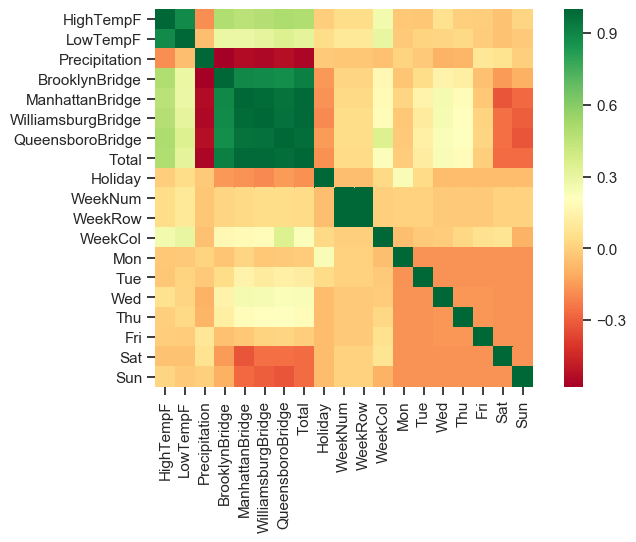

In [2624]:
#Let's plot a heatmap describing the correlation between the columns in the dataset:
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 100

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

We can see that precipitation has a strong negative impact on ridership, higher temperatures have a positive impact on ridership. Holiday also has a negative impact on ridership

Since we want to build a linear regression model, let's look for a few independent 
variables that have a significant correlation with Total.

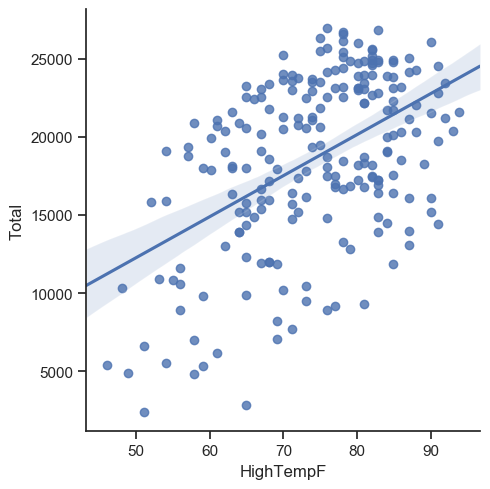

In [2625]:
#From the preceding heatmap, HighTempF has a positive correlation with Total, so we will take HightTempF as a feature (X)
#and Total as a predictor (y) for our linear regression model.
sns.lmplot(x = 'HighTempF', y = 'Total', data = df)

The preceding screenshot shows a weak correlation between these two variables.

Next we need to divide the dataset into a training dataset and a testing dataset. We train, or fit, the model to
the training dataset and then compute the accuracy by making predictions on the dataset.

In [2626]:

# Preparing the data
X = df[['HighTempF']]
y = df[['Total']]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
#Training a Linear Regression Model
regressor = LinearRegression()
# Fitting the training data to our model
regressor.fit(X_train, y_train)
#check prediction score/accuracy
print(regressor.score(X_test, y_test))

0.35291093905309984


The R2 score is 0.35 ≈ 35% accuracy, which is a litle bit low. With more than one independent variable, we will try to improve the performance of our model, which we will be looking at next.

Model evaluation.

Our linear regression model has now been successfully trained. We
separated some data from our dataset for testing, which we intend to use to find the
accuracy of the model. We will be using that to assess the efficiency of our model. 

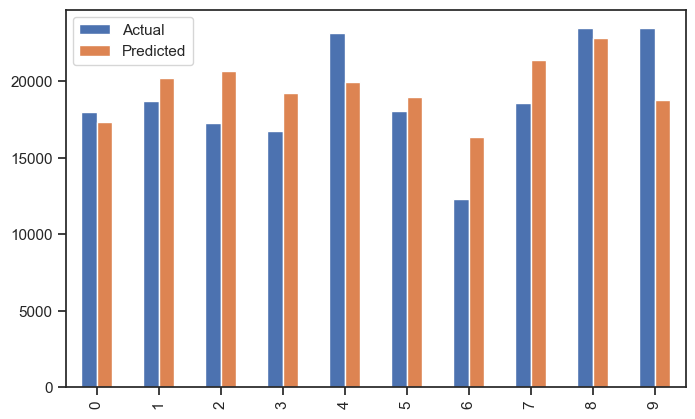

In [2627]:
#Before that, let's predict the y values with our model and evaluate it more.
# predict the y values
y_pred=regressor.predict(X_test)

# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(),'Predicted': y_pred.flatten()})
evaluate.head(10).plot(kind = 'bar')


In [2628]:
#Computing accuracy
# R2 Score
print('R2:', r2_score(y_test, y_pred))
# Mean Absolute Error (MAE)
print('MAE:', mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, y_pred))

R2: 0.3529109390530999
MAE: 3694.6730008524755
MSE: 18998580.543141715


# Implementing a multiple linear regression model

When a dependent variable relies on several independent variables, the relationship can be
captured using multiple linear regression. Multiple linear regression can be viewed as an
extension of simple linear regression.

In [2629]:

# Preparing the data
X = df[['HighTempF','Precipitation','Holiday', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
y = df[['Total']]
# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 10)

# Fitting the training data to our model
regressor.fit(X_train, y_train)
#score of this model
regressor.score(X_test, y_test)

0.6864714935783649

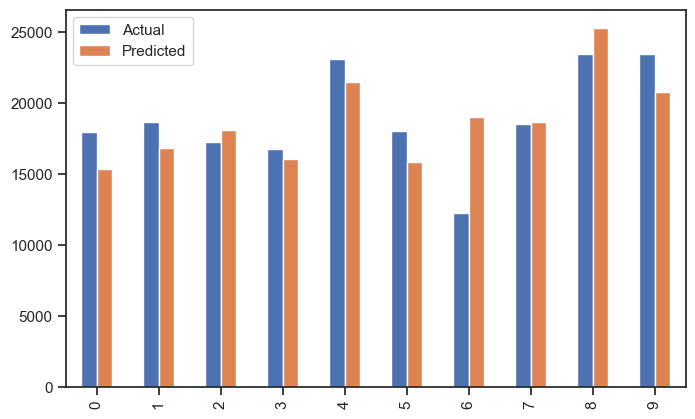

In [2630]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate2 = pd.DataFrame({'Actual': y_test.values.flatten(),'Predicted': y_pred.flatten()})
evaluate2.head(10).plot(kind='bar')

In [2631]:
#Computing accuracy
# R2 Score
print('R2:', r2_score(y_test, y_pred))
# Mean Absolute Error (MAE)
print('MAE:', mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, y_pred))

R2: 0.6864714935783649
MAE: 2417.5942899915954
MSE: 9205219.097825473


The accuracy of this model is approximately 69%.